## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
plt.style.use("ggplot")

from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras import models

## Import Data

In [ ]:
df = pd.read_csv('dataset.csv')
for i in range(len(df)):
    df.loc[i,'dastgah'] = df.iloc[i]['dastgah'].replace("D_","")

## Data Normalization & Test Train Split

In [ ]:
features = df.iloc[: , 3:]
labels = df.iloc[: , 1]
labels = labels.astype('int')
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=13)

In [ ]:
# sc = StandardScaler()
sc = MinMaxScaler(feature_range=(0, 1))
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

##Autoencoder Feature Extraction

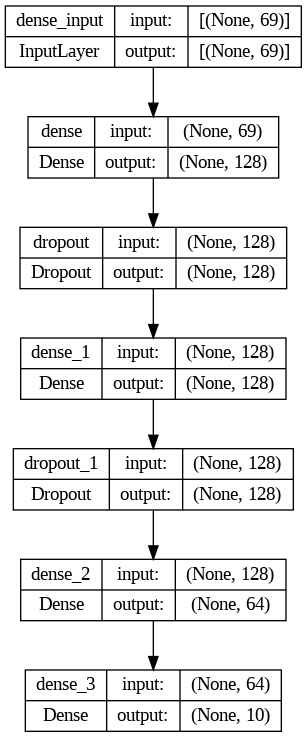

In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
plot_model(model, show_shapes=True)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=84, verbose=False)

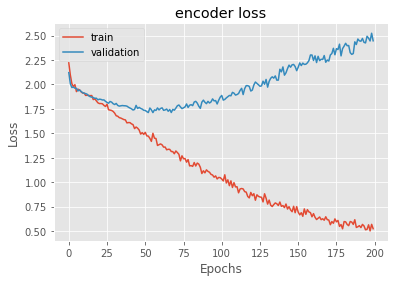

In [ ]:
#Plot Loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('encoder loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
encoder = keras.Model(inputs=model.input, outputs=model.layers[-3].output)

# encode the  data
X_train_encode = pd.DataFrame(encoder.predict(X_train))
X_test_encode = pd.DataFrame(encoder.predict(X_test))

8/8 [==============================] - 0s 2ms/step


In [ ]:
clf_SVM = SVC(kernel='rbf', C=1).fit(X_train_encode, y_train)
y_pred_SVM = clf_SVM.predict(X_test_encode)
print("accuracy = %0.2f" % accuracy_score(y_test, y_pred_SVM))

accuracy = 0.40


#PCA

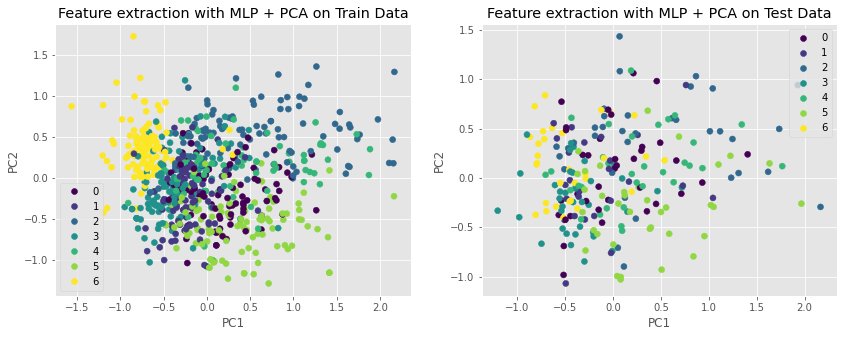

In [ ]:
n_components = 69
pca = PCA(n_components=n_components)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_encode), columns=['PC'+str(i+1) for i in range(n_components)])
X_test_pca = pd.DataFrame(pca.transform(X_test_encode), columns=['PC'+str(i+1) for i in range(n_components)])

fig = plt.figure(figsize = (14, 5)) 
fig.add_subplot(121)
plot = plt.scatter(X_train_pca.iloc[:,0], X_train_pca.iloc[:,1], c=y_train)
plt.legend(handles=plot.legend_elements()[0], labels=list(np.unique(y_train)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Feature extraction with MLP + PCA on Train Data")

fig.add_subplot(122)
plot = plt.scatter(X_test_pca.iloc[:,0], X_test_pca.iloc[:,1], c=y_test)
plt.legend(handles=plot.legend_elements()[0], labels=list(np.unique(y_test)))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Feature extraction with MLP + PCA on Test Data")

plt.show()

In [ ]:
clf_SVM = SVC(kernel='rbf', C=1).fit(X_train_pca, y_train)
y_pred_SVM = clf_SVM.predict(X_test_pca)
print("accuracy = %0.2f" % accuracy_score(y_test, y_pred_SVM))

accuracy = 0.41


#LDA

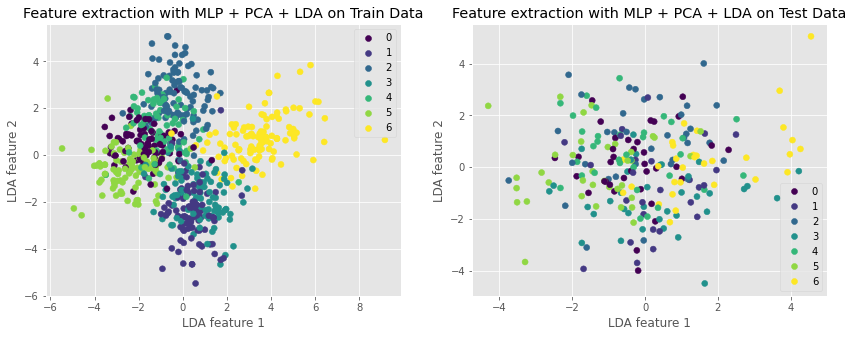

In [ ]:
lda = LDA(n_components=6)
X_train_lda = pd.DataFrame(lda.fit_transform(X_train_pca, y_train))
X_test_lda = pd.DataFrame(lda.transform(X_test_pca))

fig = plt.figure(figsize = (14, 5)) 
fig.add_subplot(121)
plot = plt.scatter(X_train_lda.iloc[:,0], X_train_lda.iloc[:,1], c=y_train)
plt.legend(handles=plot.legend_elements()[0], labels=list(np.unique(y_train)))
plt.xlabel('LDA feature 1')
plt.ylabel('LDA feature 2')
plt.title("Feature extraction with MLP + PCA + LDA on Train Data")

fig.add_subplot(122)
plot = plt.scatter(X_test_lda.iloc[:,0], X_test_lda.iloc[:,1], c=y_test)
plt.legend(handles=plot.legend_elements()[0], labels=list(np.unique(y_test)))
plt.xlabel('LDA feature 1')
plt.ylabel('LDA feature 2')
plt.title("Feature extraction with MLP + PCA + LDA on Test Data")

plt.show()

In [ ]:
clf_SVM = SVC(kernel='rbf', C=1).fit(X_train_lda, y_train)
y_pred_SVM = clf_SVM.predict(X_test_lda)
print("accuracy = %0.2f" % accuracy_score(y_test, y_pred_SVM))

accuracy = 0.44
